# Лабораторная Работа №7
### Ремизов Дмитрий А-05-20


## Задача 7.1
Найти приближенное решение задачи Коши из таблицы  с точностью $\varepsilon = 10^{-6}$ <br>
### Порядок решения задачи:
1. Найти решение задачи Коши  с фиксированным шагом  $h=0.01$ методом Эйлера и методом индивидуального варианта (задача 6.2).
2. Построить графики полученных  решений задачи. 
3. Найти решение той же задачи с заданной точностью. Построить графики решения и сравнить с п.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.integrate import odeint

## $y'= -30y - 10cos(t)+25 sin(t)-2$,  $t \in [0, 2]$
## $y_0 = -5$

Решения с заданным шагом h =  0.01 



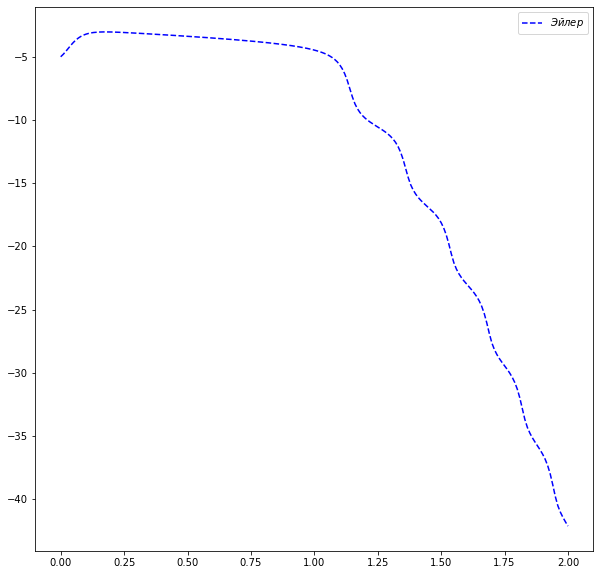

In [11]:
def f(y, t):
    return -30*y - 10*np.cos(t) + 25*np.sin(t)-2

def Euler(h, N):
    T = 2
    ti = 0
    yi = -5
    t_mas = [0]*(N+1)
    y_mas = [0]*(N+1)
    t_mas[0] = ti
    y_mas[0] = yi
    for i in range(1, N+1): 
        ti += h
        y = yi
        yi = y + h*f(ti, y)
        t_mas[i] = ti
        y_mas[i] = yi
    t_mas = np.array(t_mas)
    y_mas = np.array(y_mas)
    return t_mas, y_mas

def REuler(t0, T, y0, h, e):
    N = int((T - t0)/h)
    th, yh = Euler(t0, T, y0, h)
    th2, yh2 = Euler(t0, T, y0, h/2)
    rMax = np.abs(yh2[0] - yh[0])
    for i in range(1, N):
        if(np.abs(yh2[2*i] - yh[i]) > rMax):
            rMax = np.abs(yh2[2*i] - yh[i])
    
    while rMax > e:
        h = h/2
        N = N*2
        th = th2
        yh = yh2
        th2, yh2 = Euler(t0, T, y0, h/2)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("Euler: N = ", N, " h = ", h/2)
    return th2, yh2

def Adams(t0, T, y0, h, N):
    N = int((T - t0)/h)
    ti_1 = t0
    yi_1 = y0
    ti = ti_1 + h
    yi = yi_1 + h*f(ti_1, yi_1)
    t_mas = np.array([ti_1, ti])
    y_mas = np.array([yi_1, yi])
    for i in range(1, N):
        ti_2 = ti + h
        yi_2 = yi + (h/2)*(3*f(ti, yi) - f(ti_1, yi_1))
        t_mas = np.append(t_mas, [ti_2])
        y_mas = np.append(y_mas, [yi_2])
        ti_1 += h
        ti += h
        yi_1 = yi
        yi = yi_2
    return t_mas, y_mas
    
def RAdams(t0, T, y0, h, e):
    N = int((T - t0)/h)
    th, yh = Adams(t0, T, y0, h)
    th2, yh2 = Adams(t0, T, y0, h/2)
    rMax = np.abs(yh2[0] - yh[0])
    for i in range(1, N):
        if(np.abs(yh2[2*i] - yh[i]) > rMax):
            rMax = np.abs(yh2[2*i] - yh[i])
    
    while rMax > e:
        h = h/2
        N = N*2
        th = th2
        yh = yh2
        th2, yh2 = Adams(t0, T, y0, h/2)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("Adams: N = ", N, " h = ", h/2)
    return th2, yh2


t0 = 0
T = 2
y0 = -5
h0 = 0.01

print("Решения с заданным шагом h = ", h0, "\n")
tEuler, yEuler = Euler(0.01, int(2/0.01))
#tAdams, yAdams = Adams(t0, T, y0, h0)



fig, axs = plt.subplots(1,1, figsize = (10, 10))
x, y = Adams(t0, T, y0, h0, int((T-t0)/h0))
axs.plot(x, y, label = '$Эйлер$', color = "blue", ls = '--')
axs.legend()


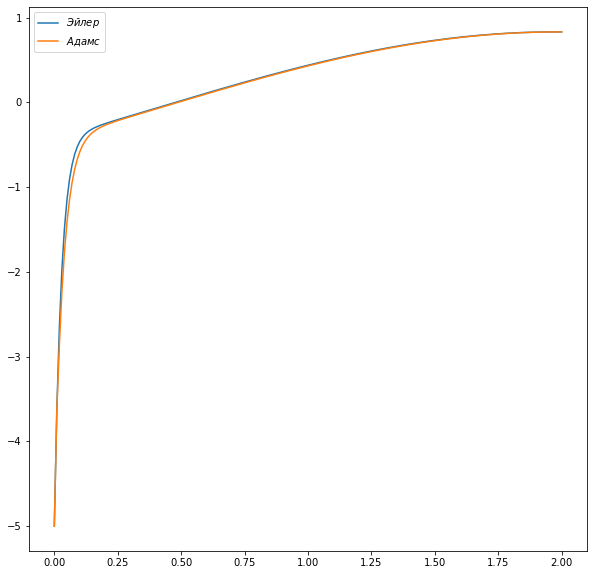

In [22]:
def f(t, y):
    return -30*y - 10*np.cos(t) + 25*np.sin(t)-2

def Euler(t0, T, y0, h, N):
    ti = t0
    yi = y0
    t_mas = []
    y_mas = []
    t_mas.append(ti)
    y_mas.append(yi)
    for i in range(1, N+1): 
        ti += h
        y = yi
        yi = y + h*f(ti, y)
        t_mas.append(ti)
        y_mas.append(yi)
    t_mas = np.array(t_mas)
    y_mas = np.array(y_mas)
    return t_mas, y_mas

def REuler(t0, T, y0, h, e):
    N = int((T - t0)/h)
    th, yh = Euler(t0, T, y0, h, N)
    th2, yh2 = Euler(t0, T, y0, h/2, N*2)
    rMax = np.abs(yh2[0] - yh[0])
    for i in range(1, N):
        if(np.abs(yh2[2*i] - yh[i]) > rMax):
            rMax = np.abs(yh2[2*i] - yh[i])
    
    while rMax > e:
        h = h/2
        N = N*2
        th = th2
        yh = yh2
        th2, yh2 = Euler(t0, T, y0, h/2, N*2)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("число точек, при котором достигается заданная точность - ", N)
    print("шаг, при котором достигается заданная точность - ", h/2)
    return th2, yh2

def Adams(t0, T, y0, h, N):
    ti_1 = t0
    yi_1 = y0
    ti = ti_1 + h
    yi = yi_1 + h*f(ti_1, yi_1)
    t_mas = np.array([ti_1, ti])
    y_mas = np.array([yi_1, yi])
    for i in range(1, N):
        ti_2 = ti + h
        yi_2 = yi + (h/2)*(3*f(ti, yi) - f(ti_1, yi_1))
        t_mas = np.append(t_mas, [ti_2])
        y_mas = np.append(y_mas, [yi_2])
        ti_1 += h
        ti += h
        yi_1 = yi
        yi = yi_2
    return t_mas, y_mas

def RAdams(t0, T, y0, h, e):
    N = int((T - t0)/h)
    th, yh = Adams(t0, T, y0, h, N)
    th2, yh2 = Adams(t0, T, y0, h/2, N*2)
    rMax = np.abs(yh2[0] - yh[0])
    for i in range(1, N):
        if(np.abs(yh2[2*i] - yh[i]) > rMax):
            rMax = np.abs(yh2[2*i] - yh[i])
    
    while rMax > e:
        h = h/2
        N = N*2
        th = th2
        yh = yh2
        th2, yh2 = Adams(t0, T, y0, h/2, N*2)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("число точек, при котором достигается заданная точность - ", N)
    print("шаг, при котором достигается заданная точность - ", h/2)
    return th2, yh2

t0 = 0
T = 2
y0 = -5
h0 = 0.01

fig, axs = plt.subplots(1,1, figsize = (10, 10))
x, y = Euler(t0, T, y0, h0, int((T-t0)/h0))
axs.plot(x, y, label = '$Эйлер$')
x, y = Adams(t0, T, y0, h0, int((T-t0)/h0))
axs.plot(x, y, label = '$Адамс$')
axs.legend()

число точек, при котором достигается заданная точность -  3276800
шаг, при котором достигается заданная точность -  3.0517578125e-07
число точек, при котором достигается заданная точность -  25600
шаг, при котором достигается заданная точность -  3.90625e-05


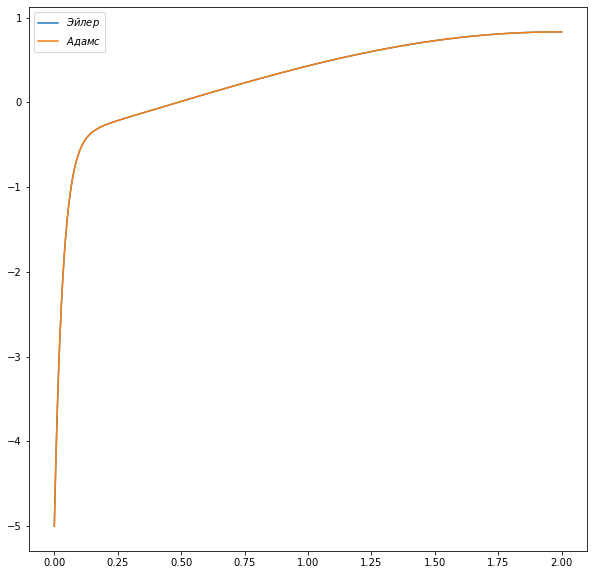

In [23]:
e = 10**(-5)
fig, axs = plt.subplots(1,1, figsize = (10, 10))
x, y = REuler(t0, T, y0, h0, e)
axs.plot(x, y, label = '$Эйлер$')
x, y = RAdams(t0, T, y0, h0, e)
axs.plot(x, y, label = '$Адамс$')
axs.legend()

In [4]:
def Eyler(t0, T, y0, h):
    N = int((T-t0)/h)+1
    Y = []
    Y.append(y0)
    for i in range(1, N):
        Y.append(Y[i - 1] + h*r(t0 + h*(i - 1))*Y[i - 1])
    Y1 = np.array(Y)    
    return Y1, N, h
    
def REyler(t0, T, y0, h0, e):
    R=[]
    Y1, N1, h1 =Eyler(t0, T, y0, h0)
    Y2, N2, h2 =Eyler(t0, T, y0, h0/2)
    for i in range(N1):
        R.append(abs(Y1[i] - Y2[2*i]))
    while(e<max(R)):
        R=[]
        Y1, N1, h1 = Y2,N2,h2
        Y2, N2, h2 =Eyler(t0, T, y0, h1/2)
        for i in range(N1):
            R.append(abs(Y1[i] - Y2[2*i]))
    return Y2, N2, h2
        
def ExtraAdams2(t0, T, y0, h):
    N=int((T-t0)/h)+1
    Y=[]
    Y.append(y0)
    Y.append(y(t0+h))
    for i in range(2, N):
        Y.append(Y[i-1]+h/2*(3*r(t0+h*(i-1))*Y[i-1]-r(t0+h*(i-2))*Y[i-2]))
    Y1=np.array(Y)
    return Y1, N, h
    
def RExtraAdams2(t0, T, y0, h0, e):
    R=[]
    Y1, N1, h1 =ExtraAdams2(t0, T, y0, h0)
    Y2, N2, h2 =ExtraAdams2(t0, T, y0, h0/2)
    for i in range(N1):
        R.append(abs(Y1[i] - Y2[2*i]))
    while(e<max(R)):
        R=[]
        Y1, N1, h1 = Y2,N2,h2
        Y2, N2, h2 =ExtraAdams2(t0, T, y0, h1/2)
        for i in range(N1):
            R.append(abs(Y1[i] - Y2[2*i]))
    return Y2, N2, h2


t0 = 0
T = 2
#y0 = -5
y0 = -2
h0 = 0.01
e = 10**(-3)
YEyler, NEyler, hEyler = REyler(t0, T, y0, h0, e)
print("Eyler: N = ", NEyler, "| h = ", hEyler)
YAdams, NAdams, hAdams = RExtraAdams2(t0, T, y0, h0, e)
print("Adams: N = ", NAdams, "| h = ", hAdams)


x_data = np.linspace(t0, T, 1000)
x_dataEyler = np.linspace(t0, T, NEyler)
x_dataAdams = np.linspace(t0, T, NAdams)
fig, AxsPogrSN = plt.subplots(figsize=(15, 5))

AxsPogrSN.plot(x_dataEyler, YEyler, label=f'$Eyler(x, {hEyler})$')
AxsPogrSN.plot(x_dataAdams, YAdams, label=f'$ExtraAdams2(x, {hAdams})$')
AxsPogrSN.plot(x_data, y(x_data), label=f'$Точн(x)$')
AxsPogrSN.legend()

print(y(np.pi/2) - YAdams[len (YAdams) - 1])

NameError: name 'r' is not defined

Сравнивая два графика, нетрудно заметить, что в силу жесткости задачи численное решение сильно раскачивается при относительно большом шаге h = 0.01. При нахождении решения задачи Коши, отталкиваясь от необходимой точности, графики решения более приближены к точному решению, нежели при отталкивании от размера шага. Погрешность при шаге 0.01 очень велика.<br>
Для решения жестких задач следует использовать специальные неявные методы.
#### Замечание
Мне пришлось изменить варизант с 21 на 24, т.к. при решении с шагом 0,01 погрешность была равна $10^{10}$ степени, а при вычислении с заданной точностью ячейка просто не компилировалась в течение получаса

## Задача 7.2
Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами <br>
$Y'(t) = AY(t)$, $Y(0)=Y_0$ <br>
$Z'(t) = BZ(t)$, $Z(0)=Z_0$, <br> где $A$ и $B$ -- заданные матрицы, $Y_0$, $Z_0$ -- заданные векторы. Исследовать поведение решения систем уравнений. <br>
### Порядок решения задачи:
1. Используя встроенную функцию для нахождения собственных чисел матриц A и B,  найти коэффициенты жесткости обеих систем. Установить какая  задача является жесткой.
2. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по явному методу Эйлера. 
3. Численно решить обе задачи  на отрезке [0,1] c шагом h=0.01 явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h.
4. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по неявному методу Эйлера. Используя составленную программу, найти решение жесткой задачи с шагом h=0.01. Построить графики компонент полученного решения.
5. Найти решение  жесткой задачи с заданной точностью $\varepsilon = 10^{-6}$. Построить графики  компонент решения и сравнить с п.4.

In [ ]:
A = np.array([[-1.485, 2.294, 1.151, 0.302], 
     [-1.794, -1.364, -0.972, -1.375],
     [-1.848, 0.634, -1.764, 2.046],
     [0.212, 0.625, -2.394, -1.386]])

Y0 = [8.4, 8.4, 6.4, 8.4]

B = np.array([[-416.68, -189.54, 278.56, -215.75],
     [-210.12, -514.15, 141.483, 289.476],
     [278.564, 127.55, -194.52, 145.269], 
     [-195.76, 309.468, 131.742, -496.65]])

Z0 = [1.2, 5.6, 3.2, 5.6]

ASobs, vA = np.linalg.eig(A)
Amax = np.amax(abs(ASobs.real))
Amin = np.amin(abs(ASobs.real))

BSobs, vB = np.linalg.eig(B)
Bmax = np.amax(abs(BSobs.real))
Bmin = np.amin(abs(BSobs.real))

print ("Собственные числа матрицы А: \n", ASobs, "\n max = ", Amax , "min = ", Amin)
print ("Коэффициент жесткости А :", Amax/Amin , "\n-------------------------------------------------------------------------\n")
print ("Собственные числа матрицы B: \n", BSobs, "\n max = ", Bmax, "min = ", Bmin)
print ("Коэффициент жесткости B :", Bmax/Bmin)

### Задачи являются жесткими

In [ ]:
def r0(t)

def Eyler(t0, T, y0, h):
    N = int((T-t0)/h)+1
    Y = []
    Y.append(y0)
    for i in range(1, N):
        Y.append(Y[i - 1] + h*r(t0 + h*(i - 1))*Y[i - 1])
    Y1 = np.array(Y)    
    return Y1, N, h

def SEyler(t0, T, y0, h, n):
    N = int((T-t0)/h)+1
    Y = [[]]
    Y.append(y0)
    
    Y1 = np.array(Y)    
    return Y1, N, h